<a href="https://colab.research.google.com/github/Chengeng-Yang/ML_projects/blob/main/ML_PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
fid = h5py.File("dataset_patchcamelyon.h5", "r")
X, Y = fid['X'][:], fid['Y'][:]
X = X / 255.
fid.close()


In [ ]:
X.shape

(2500, 96, 96, 3)

In [ ]:
X

array([[[[224, 111, 191],
         [239, 130, 209],
         [230, 127, 206],
         ...,
         [152,  82, 170],
         [224, 147, 225],
         [212, 131, 200]],

        [[177,  63, 150],
         [188,  78, 164],
         [177,  73, 158],
         ...,
         [215, 145, 234],
         [224, 147, 227],
         [215, 135, 208]],

        [[208,  99, 192],
         [194,  87, 181],
         [173,  70, 162],
         ...,
         [176, 105, 197],
         [203, 128, 210],
         [211, 133, 208]],

        ...,

        [[ 88,  31, 134],
         [ 94,  38, 137],
         [137,  82, 176],
         ...,
         [158,  99, 189],
         [110,  50, 140],
         [119,  58, 151]],

        [[155,  95, 193],
         [132,  75, 170],
         [ 85,  29, 118],
         ...,
         [121,  63, 148],
         [ 97,  38, 128],
         [127,  68, 160]],

        [[151,  90, 185],
         [131,  72, 164],
         [115,  57, 142],
         ...,
         [166, 108, 192],
        

In [ ]:
import matplotlib      # MatPlotLib is for making plots & figures
import matplotlib.pyplot as plt     # PyPlot is a subset of the library for making MATLAB-style plots

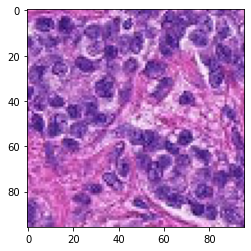

In [ ]:
plt.imshow(X[0,:, :, :])

In [ ]:
Y.shape

(2500, 1, 1, 1)

In [ ]:
X0 = X.reshape(2500,-1)
X0.shape

(2500, 27648)

In [ ]:
X[:,:,:,0].shape

(2500, 96, 96)

In [ ]:
(X[0][0][0])

array([0.87843137, 0.43529412, 0.74901961])

In [ ]:
#SPLIT X,Y
from sklearn.model_selection import train_test_split
import numpy as np      
#redo spliting, use x0_train instead

shuffle_index=np.random.permutation(2500)
X_S,Y_S = X[shuffle_index],Y[shuffle_index]

X0train,X0_test,Y0train,Y0_test=train_test_split(X_S,Y_S,test_size=0.2,random_state=30) #scikilearn
X0_train,X0_val,Y0_train,Y0_val=train_test_split(X0train,Y0train,test_size=0.2,random_state=36)



In [ ]:
import numpy as np      
#no dimension reduction

x0_train,x0_test=X0_train.reshape(1600,-1),X0_test.reshape(500,-1) 
y0_train,y0_test=Y0_train.reshape(1600,),Y0_test.reshape(500,) 

#scikilearn: x0_train,x0_test,y0_train,y0_test, for direct processing

In [ ]:
import tensorflow as tf
from tensorflow import keras

# max pooling
maxpool=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid')

x1_train,x1_test = maxpool(X0_train),maxpool(X0_test)

# average pooling
avepool=tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid')

x2_train,x2_test = avepool(X0_train),avepool(X0_test)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [ ]:
x1_train.shape

TensorShape([1600, 48, 48, 3])

In [ ]:
x1_train,x1_test=np.asarray(x1_train),np.asarray(x1_test)

x1_train,x1_test=x1_train.reshape(1600,-1),x1_test.reshape(500,-1) 
y1_train,y1_test=Y0_train.reshape(1600,),Y0_test.reshape(500,) 

In [ ]:
x2_train,x2_test=np.asarray(x2_train),np.asarray(x2_test)

x2_train,x2_test=x2_train.reshape(1600,-1),x2_test.reshape(500,-1) 
y2_train,y2_test=Y0_train.reshape(1600,),Y0_test.reshape(500,) 

In [ ]:
x2_val = avepool(X0_val)
x2_val=np.asarray(x2_val)
x2_val=x2_val.reshape(400,-1)
y2_val=Y0_val.reshape(400,)


In [ ]:
# averaging 3 layers
x3_train,x3_test = np.average(X0_train, axis=3), np.average(X0_test, axis=3)

In [ ]:
x3_train.shape

(1600, 96, 96)

In [ ]:
x3_train,x3_test=x3_train.reshape(1600,-1),x3_test.reshape(500,-1) 
y3_train,y3_test=Y0_train.reshape(1600,),Y0_test.reshape(500,) 

In [ ]:
x3_train.shape

(1600, 9216)

In [ ]:
# No dimension reduction
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

clf01 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)

param1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,1000,75).tolist(),
          "min_samples_leaf":np.arange(1,500,50).tolist(),
          }

search01 = RandomizedSearchCV(clf01, param1, cv = 4,
                            n_iter=75, verbose=1)

search01.fit(x0_train, y0_train)

# Save the parameters
RF0 = search01.best_params_
print(RF0)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.8min finished


{'n_estimators': 101, 'min_samples_leaf': 1, 'max_depth': 752}


In [ ]:
# Create the optimal classifier
clf01_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF0["n_estimators"],
                              max_depth = RF0["max_depth"],
                              min_samples_leaf = RF0["min_samples_leaf"]
                              )

# Predict on test data
clf01_opt.fit(x0_train, y0_train)

RandomForestClassifier(max_depth=752, n_estimators=101, n_jobs=-1,
                       random_state=36)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

clf02 = KNeighborsClassifier()

param2 = {
    "n_neighbors": np.arange(2,250,50),
    "weights": ['uniform','distance'],
    "p": [1,2],
    "metric": ['minkowski', 'euclidean','manhattan']}

search02 = RandomizedSearchCV(clf02, param2, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)
search02.fit(x0_train, y0_train)

# Save the best parameters
knn0 = search02.best_params_
print(knn0)

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=75. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 96.3min finished


{'weights': 'distance', 'p': 1, 'n_neighbors': 52, 'metric': 'minkowski'}


In [ ]:
# Create the optimal classifier
clf02_opt = KNeighborsClassifier(
    n_neighbors = knn0['n_neighbors'],
    weights = knn0['weights'],
    p = knn0['p'],
    metric = knn0['metric']
    )


# Predict on test data
clf02_opt.fit(x0_train, y0_train)

KNeighborsClassifier(n_neighbors=52, p=1, weights='distance')

In [ ]:
# initialize the classifiers
clf05 = MultinomialNB(class_prior=None)

param5 = {
    'alpha': np.arange(0.01, 2, 0.02),
    'fit_prior': ['True','False']
                }

search05 = RandomizedSearchCV(clf05, param5, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)

search05.fit(x0_train, y0_train)

# Save the best parameters
mnb0 = search05.best_params_
print(mnb0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 75 candidates, totalling 300 fits
{'fit_prior': 'False', 'alpha': 1.2499999999999998}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   55.2s finished


In [ ]:
# Create the optimal classifier
clf05_opt = MultinomialNB(class_prior=None,
                            alpha = mnb0['alpha'],
                            fit_prior = mnb0['fit_prior'])


# Predict on test data
clf05_opt.fit(x0_train, y0_train)

MultinomialNB(alpha=1.2499999999999998, fit_prior='False')

In [ ]:
#after dimension reduction -X1
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
clf11 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,1000,75).tolist(),
          "min_samples_leaf":np.arange(1,500,50).tolist(),
          }

search11 = RandomizedSearchCV(clf11, param1, cv = 4,
                            n_iter=75, verbose=1)

search11.fit(x1_train, y1_train)

## Save the parameters 
RF1 = search11.best_params_
print(RF1)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.9min finished


{'n_estimators': 201, 'min_samples_leaf': 1, 'max_depth': 77}


In [ ]:
# Create the optimal classifier
clf11_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF1["n_estimators"],
                              max_depth = RF1["max_depth"],
                              min_samples_leaf = RF1["min_samples_leaf"]
                              )

# Predict on test data
clf11_opt.fit(x1_train, y1_train)

RandomForestClassifier(max_depth=77, n_estimators=201, n_jobs=-1,
                       random_state=36)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf12 = KNeighborsClassifier()

param2 = {
    "n_neighbors": np.arange(2,250,50),
    "weights": ['uniform','distance'],
    "p": [1,2],
    "metric": ['minkowski', 'euclidean','manhattan']}

search12 = RandomizedSearchCV(clf12, param2, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)
search12.fit(x1_train, y1_train)

# Save the best parameters
knn1 = search12.best_params_
print(knn1)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=75. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 23.5min finished


{'weights': 'distance', 'p': 1, 'n_neighbors': 202, 'metric': 'minkowski'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create the optimal classifier
clf12_opt = KNeighborsClassifier(
    n_neighbors= knn1['n_neighbors'],
    weights= knn1['weights'],
    p= knn1['p'],
    metric= knn1['metric']
    )


# Predict on test data
clf12_opt.fit(x1_train, y1_train)

KNeighborsClassifier(n_neighbors=202, p=1, weights='distance')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

# initialize the classifiers
clf15 = MultinomialNB(class_prior=None)

param5 = {
    'alpha': np.arange(0.01, 2, 0.02),
    'fit_prior': ['True','False']
                }

search15 = RandomizedSearchCV(clf15, param5, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)

search15.fit(x1_train, y1_train)

# Save the best parameters
mnb1 = search15.best_params_
print(mnb1)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'fit_prior': 'True', 'alpha': 0.30999999999999994}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   14.6s finished


In [ ]:
# Create the optimal classifier
clf15_opt = MultinomialNB(class_prior=None,
                            alpha = mnb1['alpha'],
                            fit_prior = mnb1['fit_prior'])


# Predict on test data
clf15_opt.fit(x1_train, y1_train)

MultinomialNB(alpha=0.30999999999999994, fit_prior='True')

In [ ]:
#after dimension reduction -X2

clf21 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,1000,75).tolist(),
          "min_samples_leaf":np.arange(1,500,50).tolist(),
          }

search21 = RandomizedSearchCV(clf21, param1, cv = 4,
                            n_iter=75, verbose=1)

search21.fit(x2_train, y2_train)

## Save the parameters 
RF2 = search21.best_params_
print(RF2)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.8min finished


{'n_estimators': 351, 'min_samples_leaf': 1, 'max_depth': 527}


In [ ]:
# Create the optimal classifier
clf21_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF2["n_estimators"],
                              max_depth = RF2["max_depth"],
                              min_samples_leaf = RF2["min_samples_leaf"]
                              )

# Predict on test data
clf21_opt.fit(x2_train, y2_train)

RandomForestClassifier(max_depth=527, n_estimators=351, n_jobs=-1,
                       random_state=36)

In [ ]:
clf22 = KNeighborsClassifier()

param2 = {
    "n_neighbors": np.arange(2,250,50),
    "weights": ['uniform','distance'],
    "p": [1,2],
    "metric": ['minkowski', 'euclidean','manhattan']}

search22 = RandomizedSearchCV(clf22, param2, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)
search22.fit(x2_train, y2_train)

# Save the best parameters
knn2 = search22.best_params_
print(knn2)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=75. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 23.5min finished


{'weights': 'distance', 'p': 1, 'n_neighbors': 52, 'metric': 'minkowski'}


In [ ]:
# Create the optimal classifier
clf22_opt = KNeighborsClassifier(
    n_neighbors= knn2['n_neighbors'],
    weights= knn2['weights'],
    p= knn2['p'],
    metric= knn2['metric']
    )


# Predict on test data
clf22_opt.fit(x2_train, y2_train)

KNeighborsClassifier(n_neighbors=52, p=1, weights='distance')

In [ ]:
# initialize the classifiers
clf25 = MultinomialNB(class_prior=None)

param5 = {
    'alpha': np.arange(0.01, 2, 0.02),
    'fit_prior': ['True','False']
                }

search25 = RandomizedSearchCV(clf25, param5, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)

search25.fit(x2_train, y2_train)

# Save the best parameters
mnb2 = search25.best_params_
print(mnb2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 75 candidates, totalling 300 fits
{'fit_prior': 'False', 'alpha': 1.8699999999999997}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   14.5s finished


In [ ]:
# Create the optimal classifier
clf25_opt = MultinomialNB(class_prior=None,
                            alpha = mnb2['alpha'],
                            fit_prior = mnb2['fit_prior'])


# Predict on test data
clf25_opt.fit(x2_train, y2_train)

MultinomialNB(alpha=1.8699999999999997, fit_prior='False')

In [ ]:
#averaging 3 layers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf31 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)

param1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,1000,75).tolist(),
          "min_samples_leaf":np.arange(1,500,50).tolist(),
          }

search31 = RandomizedSearchCV(clf31, param1, cv = 4,
                            n_iter=75, verbose=1)

search31.fit(x3_train, y3_train)

# Save the parameters
RF3 = search31.best_params_
print(RF3)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.0min finished


{'n_estimators': 451, 'min_samples_leaf': 1, 'max_depth': 902}


In [ ]:
# Create the optimal classifier
from sklearn.ensemble import RandomForestClassifier
clf31_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF3['n_estimators'], 
                              max_depth = RF3['max_depth'], 
                              min_samples_leaf = RF3['min_samples_leaf'], 
                              )

# Predict on test data
clf31_opt.fit(x3_train, y3_train)

RandomForestClassifier(max_depth=902, n_estimators=451, n_jobs=-1,
                       random_state=36)

In [ ]:
clf32 = KNeighborsClassifier()

param2 = {
    "n_neighbors": np.arange(2,250,50),
    "weights": ['uniform','distance'],
    "p": [1,2],
    "metric": ['minkowski', 'euclidean','manhattan']}

search32 = RandomizedSearchCV(clf32, param2, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)
search32.fit(x3_train, y3_train)

# Save the best parameters
knn3 = search32.best_params_
print(knn3)

/home/chengeng/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=75. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 31.3min finished


{'weights': 'distance', 'p': 1, 'n_neighbors': 52, 'metric': 'minkowski'}


In [ ]:
# Create the optimal classifier
clf32_opt = KNeighborsClassifier(
            n_neighbors= knn3['n_neighbors'],
            weights= knn3['weights'], 
            p= knn3['p'], 
            metric= knn3['metric'] 
    )


# Predict on test data
clf32_opt.fit(x3_train, y3_train)

KNeighborsClassifier(n_neighbors=52, p=1, weights='distance')

In [ ]:
# initialize the classifiers
clf35 = MultinomialNB(class_prior=None)

param5 = {
    'alpha': np.arange(0.01, 2, 0.02),
    'fit_prior': ['True','False']
                }

search35 = RandomizedSearchCV(clf35, param5, cv = 4,
                                n_iter=75,
                                return_train_score=False,
                                verbose=1)

search35.fit(x3_train, y3_train)

# Save the best parameters
mnb3 = search35.best_params_
print(mnb3)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'fit_prior': 'False', 'alpha': 0.6699999999999999}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   17.6s finished


In [ ]:
# Create the optimal classifier
clf35_opt = MultinomialNB(class_prior=None,
                            alpha = mnb3['alpha'],
                            fit_prior = mnb3['fit_prior'])


# Predict on test data
clf35_opt.fit(x3_train, y3_train)

MultinomialNB(alpha=0.6699999999999999, fit_prior='False')

In [ ]:
y0pred1 = clf01_opt.predict(x0_test)
y0pred2 = clf02_opt.predict(x0_test)
y0pred5 = clf05_opt.predict(x0_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y0_test,y0pred1),
      accuracy_score(y0_test,y0pred2),
      accuracy_score(y0_test,y0pred5))

print(precision_score(y0_test,y0pred1),
      precision_score(y0_test,y0pred2),
      precision_score(y0_test,y0pred5))

0.802 0.732 0.596
0.7725631768953068 0.6823899371069182 0.603448275862069


In [ ]:
y1pred1 = clf11_opt.predict(x1_test)
y1pred2 = clf12_opt.predict(x1_test)
y1pred5 = clf15_opt.predict(x1_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y1_test,y1pred1),
      accuracy_score(y1_test,y1pred2),
      accuracy_score(y1_test,y1pred5))

print(precision_score(y1_test,y1pred1),
      precision_score(y1_test,y1pred2),
      precision_score(y1_test,y1pred5))

0.778 0.636 0.62
0.7473309608540926 0.6268656716417911 0.6401869158878505


In [ ]:
y2pred1 = clf21_opt.predict(x2_test)
y2pred2 = clf22_opt.predict(x2_test)
y2pred5 = clf25_opt.predict(x2_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y2_test,y2pred1),
      accuracy_score(y2_test,y2pred2),
      accuracy_score(y2_test,y2pred5))

print(precision_score(y2_test,y2pred1),
      precision_score(y2_test,y2pred2),
      precision_score(y2_test,y2pred5))

0.808 0.746 0.592
0.7730496453900709 0.6880733944954128 0.5982905982905983


In [ ]:
y3pred1 = clf31_opt.predict(x3_test)
y3pred2 = clf32_opt.predict(x3_test)
y3pred5 = clf35_opt.predict(x3_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y3_test,y3pred1),
      accuracy_score(y3_test,y3pred2),
      accuracy_score(y3_test,y3pred5))

print(precision_score(y3_test,y3pred1),
      precision_score(y3_test,y3pred2),
      precision_score(y3_test,y3pred5))

0.802 0.72 0.532
0.7915057915057915 0.6697530864197531 0.5298507462686567


In [ ]:
x1_train.shape

(1600, 6912)

Correction: Ranges for parameter searching and possible overfitting issue.
**These issues were raised during the presentation. After presentation, we carefully reconsidered the hyperparameter search ranges of min_samples_leaf and max depth, reset them for new searches to avoid possible overfitting problem brought by random forest classifier**


In [ ]:
# RF, updated search range1
# try to reduce the max depth and modify the range for min samples per leaf to see if the accuracy 
# on the test data improves

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf01_new = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,500,100).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search01_new = RandomizedSearchCV(clf01_new, param1_new, cv = 4,
                            n_iter=100, verbose=1)

search01_new.fit(x0_train, y0_train)

## Save the parameters 
RF0_new = search01_new.best_params_
print(RF0_new)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  8.6min finished


{'n_estimators': 301, 'min_samples_leaf': 7, 'max_depth': 402}


In [ ]:
# Create the optimal classifier
clf01_new_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF0_new["n_estimators"],
                              max_depth = RF0_new["max_depth"],
                              min_samples_leaf = RF0_new["min_samples_leaf"]
                              )

# Predict on test data
clf01_new_opt.fit(x0_train, y0_train)

RandomForestClassifier(max_depth=402, min_samples_leaf=7, n_estimators=301,
                       n_jobs=-1, random_state=36)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf11_new = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,500,100).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search11_new = RandomizedSearchCV(clf11_new, param1_new, cv = 4,
                            n_iter=100, verbose=1)

search11_new.fit(x1_train, y1_train)

## Save the parameters 
RF1_new = search11_new.best_params_
print(RF1_new)


Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.7min finished


{'n_estimators': 251, 'min_samples_leaf': 7, 'max_depth': 302}


In [ ]:
# Create the optimal classifier
clf11_new_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF1_new["n_estimators"],
                              max_depth = RF1_new["max_depth"],
                              min_samples_leaf = RF1_new["min_samples_leaf"]
                              )

# Predict on test data
clf11_new_opt.fit(x1_train, y1_train)

RandomForestClassifier(max_depth=302, min_samples_leaf=7, n_estimators=251,
                       n_jobs=-1, random_state=36)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf21_new = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,500,100).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search21_new = RandomizedSearchCV(clf21_new, param1_new, cv = 4,
                            n_iter=100, verbose=1)

search21_new.fit(x2_train, y2_train)

## Save the parameters 
RF2_new = search21_new.best_params_
print(RF2_new)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  4.1min finished


{'n_estimators': 351, 'min_samples_leaf': 1, 'max_depth': 302}


In [ ]:
# Create the optimal classifier
clf21_new_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF2_new["n_estimators"],
                              max_depth = RF2_new["max_depth"],
                              min_samples_leaf = RF2_new["min_samples_leaf"]
                              )

# Predict on test data
clf21_new_opt.fit(x2_train, y2_train)

RandomForestClassifier(max_depth=302, n_estimators=351, n_jobs=-1,
                       random_state=36)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf31_new = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,500,100).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search31_new = RandomizedSearchCV(clf31_new, param1_new, cv = 4,
                            n_iter=100, verbose=1)

search31_new.fit(x3_train, y3_train)

## Save the parameters 
RF3_new = search31_new.best_params_
print(RF3_new)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  4.8min finished


{'n_estimators': 201, 'min_samples_leaf': 13, 'max_depth': 402}


In [ ]:
# Create the optimal classifier
clf31_new_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF3_new["n_estimators"],
                              max_depth = RF3_new["max_depth"],
                              min_samples_leaf = RF3_new["min_samples_leaf"]
                              )

# Predict on test data
clf31_new_opt.fit(x3_train, y3_train)

RandomForestClassifier(max_depth=402, min_samples_leaf=13, n_estimators=201,
                       n_jobs=-1, random_state=36)

In [ ]:
y0pred1_new = clf01_new_opt.predict(x0_test)
y1pred1_new = clf11_new_opt.predict(x1_test)
y2pred1_new = clf21_new_opt.predict(x2_test)
y3pred1_new = clf31_new_opt.predict(x3_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y0_test,y0pred1_new),
      accuracy_score(y1_test,y1pred1_new),
      accuracy_score(y2_test,y2pred1_new),
      accuracy_score(y3_test,y3pred1_new)
     )

0.792 0.774 0.808 0.798


Reduced search range and modified min sample per leaf maintain or slightly decrease the accuracy on the test data.
Among them, still average pooling gives the best accuracy comparable to the one without dimension reduction.

In [ ]:
# RF, updated search range2
# try to reduce the max depth a little bit more to see if the accuracy on the test data improves

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf01_new1 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,250,50).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search01_new1 = RandomizedSearchCV(clf01_new1, param1_new1, cv = 4,
                            n_iter=100, verbose=1)

search01_new1.fit(x0_train, y0_train)

## Save the parameters 
RF0_new1 = search01_new1.best_params_
print(RF0_new1)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  8.0min finished


{'n_estimators': 301, 'min_samples_leaf': 7, 'max_depth': 52}


In [ ]:
# Create the optimal classifier
clf01_new1_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF0_new1["n_estimators"],
                              max_depth = RF0_new1["max_depth"],
                              min_samples_leaf = RF0_new1["min_samples_leaf"]
                              )

# Predict on test data
clf01_new1_opt.fit(x0_train, y0_train)

RandomForestClassifier(max_depth=52, min_samples_leaf=7, n_estimators=301,
                       n_jobs=-1, random_state=36)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf11_new1 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,250,50).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search11_new1 = RandomizedSearchCV(clf11_new1, param1_new1, cv = 4,
                            n_iter=100, verbose=1)

search11_new1.fit(x1_train, y1_train)

## Save the parameters 
RF1_new1 = search11_new1.best_params_
print(RF1_new1)


Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.7min finished


{'n_estimators': 251, 'min_samples_leaf': 7, 'max_depth': 202}


In [ ]:
# Create the optimal classifier
clf11_new1_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF1_new1["n_estimators"],
                              max_depth = RF1_new1["max_depth"],
                              min_samples_leaf = RF1_new1["min_samples_leaf"]
                              )

# Predict on test data
clf11_new1_opt.fit(x1_train, y1_train)

RandomForestClassifier(max_depth=202, min_samples_leaf=7, n_estimators=251,
                       n_jobs=-1, random_state=36)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf21_new1 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,250,50).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search21_new1 = RandomizedSearchCV(clf21_new1, param1_new1, cv = 4,
                            n_iter=100, verbose=1)

search21_new1.fit(x2_train, y2_train)

## Save the parameters 
RF2_new1 = search21_new1.best_params_
print(RF2_new1)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  4.3min finished


{'n_estimators': 51, 'min_samples_leaf': 1, 'max_depth': 202}


In [ ]:
# Create the optimal classifier
clf21_new1_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF2_new1["n_estimators"],
                              max_depth = RF2_new1["max_depth"],
                              min_samples_leaf = RF2_new1["min_samples_leaf"]
                              )

# Predict on test data
clf21_new1_opt.fit(x2_train, y2_train)

RandomForestClassifier(max_depth=202, n_estimators=51, n_jobs=-1,
                       random_state=36)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf31_new1 = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36)
param1_new1 = {"n_estimators": np.arange(1,500,50).tolist(),
          "max_depth":np.arange(2,250,50).tolist(),        # reduced
          "min_samples_leaf":np.arange(1,50,6).tolist(),    # adjusted
          }

search31_new1 = RandomizedSearchCV(clf31_new1, param1_new1, cv = 4,
                            n_iter=100, verbose=1)

search31_new1.fit(x3_train, y3_train)

## Save the parameters 
RF3_new1 = search31_new1.best_params_
print(RF3_new1)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  4.8min finished


{'n_estimators': 251, 'min_samples_leaf': 7, 'max_depth': 202}


In [ ]:
# Create the optimal classifier
clf31_new1_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = RF3_new1["n_estimators"],
                              max_depth = RF3_new1["max_depth"],
                              min_samples_leaf = RF3_new1["min_samples_leaf"]
                              )

# Predict on test data
clf31_new1_opt.fit(x3_train, y3_train)

RandomForestClassifier(max_depth=202, min_samples_leaf=7, n_estimators=251,
                       n_jobs=-1, random_state=36)

In [ ]:
y0pred1_new1 = clf01_new1_opt.predict(x0_test)
y1pred1_new1 = clf11_new1_opt.predict(x1_test)
y2pred1_new1 = clf21_new1_opt.predict(x2_test)
y3pred1_new1 = clf31_new1_opt.predict(x3_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y0_test,y0pred1_new1),
      accuracy_score(y1_test,y1pred1_new1),
      accuracy_score(y2_test,y2pred1_new1),
      accuracy_score(y3_test,y3pred1_new1)
     )

0.792 0.774 0.792 0.806


Reduced search range actually decrease the accuracy on the test data.
Among them, still average pooling gives the best accuracy comparable to the one without dimension reduction.
Even if the dimension strategy of averaging 3 channels yield accuracy close to that of average pooling, considering efficiency, average pooling is better because it has fewer dimensions (48*48*2) than the former do (96*96).

Compare RF with average pooling and 3 different search ranges in other metrics

In [ ]:
# RF, previous search range, average pooling
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score

print(precision_score(y2_test,y2pred1))
print(recall_score(y2_test,y2pred1))
print(f1_score(y2_test,y2pred1))

0.7473309608540926
0.84
0.7909604519774012


In [ ]:
# RF, updated search range1, average pooling
print(precision_score(y2_test,y2pred1_new))
print(recall_score(y2_test,y2pred1_new))
print(f1_score(y2_test,y2pred1_new))

0.7730496453900709
0.872
0.8195488721804511


In [ ]:
# RF, updated search range2, average pooling
print(precision_score(y2_test,y2pred1_new1))
print(recall_score(y2_test,y2pred1_new1))
print(f1_score(y2_test,y2pred1_new1))

0.7570422535211268
0.86
0.8052434456928839


Because RF with search range 1 yields comparable accuaracy to RF with previous search range, and outruns in other metrics, it's reasonable to proceed with the best hyperparameters found in the search range 1.